# 1 AUTHOR
### Student Name: Jude Damian Sequeira 
### Student ID:220431413

# 2 Problem formulation

This notebook consists of two sections, the first part is using the KMeans Clustering algorithm to find new cluster labels from the audio files and MLENDLS dataset, and for the other section a ML model will be used as classification problem based on the types of clusters formed.

The MLEndLS Sounds dataset consists of 2500 audio files. I will be using the same audio features namely  Power,Pitch-Mean,Pitch-StandardDeviation,Fraction of Voiced Region,used in the previous notebook but this time will use the labelled data obtained from the unsupervised KMeans algorithm. All the data including the audio features will be stored in a dataframe for finding the best K value for the unsupervised algorithm.

After classifying data into clusters, Hyperparameter Optimization technique and cross validation will be used and depending on the type of classification problem(i:e binary or multiclass) the appropriate ML models will be chosen and compared, to finally obtain the best model.



# 3 Machine Learning Pipeline

# 4 Transformation stage

To extract features from audio file such as Power , Pitch-mean , Pitch-Standard Deviation, Fraction of Voiced Region, we will use the getXy and getPitch functions which will store the audio features from the audio files into an array format, which will be used for model assessment and prediction.

These features will then be stored into a dataframe for finding the cluster labels from the Kmeans algorithm


# 5 Modelling
In our dataset, the there are multiple cluster formation hence our problem is a multiclass classification problem, hence models such as decision tree, random forest, naive bayes and KNN are used in the analysis.

Decision Tree algorithm uses a tree structure consisting of nodes to classify data points until it reaches its child node, which is in our case the cluster label, whereas Random Forest uses a collection of decision tree and finds the average of each decision tree as its output.

The naive bayes algorithm is a probabilistic approach which assigns a probabilty to each observation belonging to a class.

K-Nearest Neighbour or KNN is a Machine Learning algorithm based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases based on the number of neighbors selected(denoted by K) and puts the new case into the category that is most similar to the available categories.



# 6 Methodology

After extracting the 4 audio features, the features are stored in a dataframe for performing Kmeans cluster analysis. Before implementing Kmeans, the MinMax Scaler is implemented to scale all features to the same scale or else the Kmeans algorithm will cluster data points inefficiently.

After this step, the best K value(no. of centroids) for Kmeans clustering is evaluated using the combination of the elbow and silhouette techniques.

The Elbow method which runs k-means clustering on the dataset for a range of values for K (say from 1-20) and then for each value of K computes an average score for all clusters. By default, the distortion score(Sum of Squared Error) is computed, the sum of square distances from each point to its assigned center. The point on the plotted line which shows a bent-shape is the value of K. The value of K is found to be 5.

The Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. This value ranges between -1 and 1. A higher score indicates a better clustering quality.

Using both techniques the best K value was found to be K=5, and by using this technique 5 clusters were obtained from the dataset  labelled as 0,1,2,3 & 4 respectively.

The next part is the Machine Learning part to classify the cluster labels. Hyperparameter Optimisation is used to find the best model by using the GridSearchCV function. 4 ML models namely, Multinomial Naive Bayes,KNN,Decision Tree and Random Forest are used. Since our problem is now a multiclass classification problem with cluster labels 0,1,2,3&4 , these models are well suited in this case.

The various hyperparameters are considered for each model and the GridSearchCV will implement each combination of these parameters and give results over the 10 fold cross validation. The f1_score macro metric is used as it calculates f1 score in each class labels without taking the imbalanced property of dataset. 



# 7 Dataset

### Extracting Audio Files from Google Drive

In [1]:
from google.colab import drive
from google.colab import files
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/ML_miniproject_data/MLEndLS'
os.listdir(path)

['MLEndLS (1).zip', 'sample', 'sample_new']

In [ ]:
if True:
  directory_to_extract_to = '/content/drive/MyDrive/ML_miniproject_data/MLEndLS/sample/'
  zip_path = '/content/drive/MyDrive/ML_miniproject_data/MLEndLS/MLEndLS (1).zip'
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall(directory_to_extract_to)

In [ ]:
sample_path = '/content/drive/MyDrive/ML_miniproject_data/MLEndLS/sample/MLEndLS/*.wav'
files = glob.glob(sample_path)
len(files)

2500

In [4]:
from google.colab import files
files.upload()

Saving MLEndLS.csv to MLEndLS.csv


{'MLEndLS.csv': b'file_id,area,spot,in_out,Participant\r\n0001.wav,british,street,outdoor,S151\r\n0002.wav,kensington,dinosaur,indoor,S127\r\n0003.wav,campus,square,outdoor,S18\r\n0004.wav,kensington,hintze,indoor,S179\r\n0005.wav,campus,square,outdoor,S176\r\n0006.wav,westend,piazza,outdoor,S89\r\n0007.wav,Euston,upper,indoor,S140\r\n0008.wav,campus,canal,outdoor,S20\r\n0009.wav,british,forecourt,outdoor,S131\r\n0010.wav,british,forecourt,outdoor,S69\r\n0011.wav,british,forecourt,outdoor,S39\r\n0012.wav,british,forecourt,outdoor,S136\r\n0013.wav,british,greatcourt,indoor,S66\r\n0014.wav,campus,square,outdoor,S145\r\n0015.wav,campus,reception,indoor,S99\r\n0016.wav,westend,leicester,outdoor,S137\r\n0017.wav,british,street,outdoor,S73\r\n0018.wav,british,forecourt,outdoor,S55\r\n0019.wav,kensington,dinosaur,indoor,S82\r\n0020.wav,british,forecourt,outdoor,S105\r\n0021.wav,british,street,outdoor,S181\r\n0022.wav,westend,leicester,outdoor,S3\r\n0023.wav,westend,piazza,outdoor,S101\r\n0024

In [5]:
MLENDLS_df = pd.read_csv('MLEndLS.csv').set_index('file_id') 

[0.         0.         0.         ... 0.02081299 0.02050781 0.02096558]
Are all elements of array x zero? : False
44100


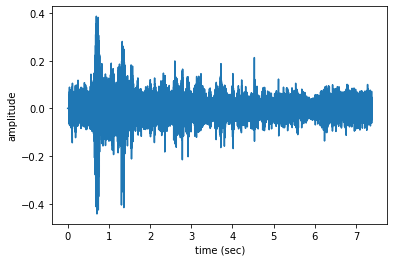

In [ ]:
n=1000                                                             # audio signal amplitude
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
print(x)
print("Are all elements of array x zero? :",np.all((x==0)))
print(fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

In [ ]:
MLENDLS_df.loc[files[n].split('/')[-1]]

area            campus
spot            square
in_out         outdoor
Participant       S179
Name: 0500.wav, dtype: object

[0. 0. 0. ... 0. 0. 0.]
Are all elements of array x zero? : True
44100


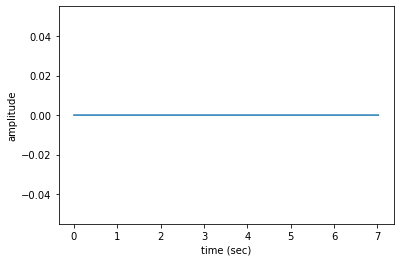

In [ ]:
n=2498                                                         #broken audio signal
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
print(x)
print("Are all elements of array x zero? :",np.all((x==0)))
print(fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))


In [ ]:
MLENDLS_df.loc[files[n].split('/')[-1]]

area           kensington
spot                 pond
in_out            outdoor
Participant          S102
Name: 0033.wav, dtype: object

### Finding Broken Audio Files

The above graph shows a broken audio file which means there is no audio signal recorded and this will give an error while extracting features. 

The next piece of code finds which audio files are broken and then we remove these files from the google drive folder and the csv dataset.

In [ ]:
for n in range(0,2500):                                                 # to find which audio signal is broken
  fs = None # Sampling frequency
  x, fs = librosa.load(files[n],sr=fs)
  
  if np.all((x==0))==True:
    print("n=",n)
    print(MLENDLS_df.loc[files[n].split('/')[-1]],"\n")
  

n= 2498
area           kensington
spot                 pond
in_out            outdoor
Participant          S102
Name: 0033.wav, dtype: object 

n= 2499
area            campus
spot            square
in_out         outdoor
Participant       S102
Name: 2206.wav, dtype: object 



From the above output, there are two broken files both of participant S102
with names 0033.wav and 2206.wav.

The next step is to delete these from the google drive folder and reload the audio files as shown below. We can observe that the length of the audio files are deleted and reduced by 2.

In [ ]:
sample_path = '/content/drive/MyDrive/ML_miniproject_data/MLEndLS/sample/MLEndLS/*.wav'
files_new = glob.glob(sample_path)
len(files_new)

2498

In [6]:
MLENDLS_df = pd.read_csv('MLEndLS.csv')                           # deleting rows in dataframe with audio files 0033.wav and 2206.wav
MLENDLS_df.drop( index=[32,2205],inplace=True)
MLENDLS_df=MLENDLS_df.set_index('file_id') 
MLENDLS_df[30:35]

,area,spot,in_out,Participant
file_id,,,,
0031.wav,kensington,dinosaur,indoor,S72
0032.wav,british,greatcourt,indoor,S162
0034.wav,westend,national,indoor,S144
0035.wav,campus,library,outdoor,S27
0036.wav,southbank,skate,outdoor,S111


### Feature Extraction

To extract features from audio file such as Power , Pitch-mean , Pitch-Standard Deviation, Fraction of Voiced Region, we will use the getXy and getPitch functions which will store the audio features into an array format, which will be used for model assessment and prediction.

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [ ]:
def getXy(files_new,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files_new):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['in_out']=='indoor'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

In [ ]:
if False:
  X,y = getXy(files_new, labels_file=MLENDLS_df_new, scale_audio=True, onlySingleDigit=True)

100%|██████████| 2498/2498 [1:09:26<00:00,  1.67s/it]


In [ ]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print(' The number of indoor recordings is ', np.count_nonzero(y))
print(' The number of outdoor recordings is ', y.size - np.count_nonzero(y))
print('The Unique values of y is',np.unique(y))

The shape of X is (2498, 4)
The shape of y is (2498,)
 The number of indoor recordings is  1181
 The number of outdoor recordings is  1317


The above dataset displays that the number of indoor data less than outdoor data. But in our problem we will use KMeans to find new labels and then classify those labels for analysis. Also each input has 4 features which will be fed to the ML model.


The below code is used to save the features and labels after feature extraction into a numpy file. This step is used as a backup as we wont need to perform feature extraction each time we run the notebook as it is a time consuming process.

In [ ]:

if False:

  file= open("X_feat.npy","wb")                #saving audio features to npy file to current directory
  np.save(file,X)
  file.close

  file= open("y_feat.npy","wb")                #saving audio labels to npy file to current directory
  np.save(file,y)
  file.close

In [2]:
file= open("X_feat.npy","rb")                #load audio features to npy file
X=np.load(file)

file= open("y_feat.npy","rb")                #load audio labels to npy file
y=np.load(file)

print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)

The shape of X is (2498, 4)
The shape of y is (2498,)


The next step is to Use KMeans Clustering on the 4 audio features extracted. These features are stored in dataframe below

In [7]:
MLENDLS_df['power']=X[:,0]
MLENDLS_df['pitch_mean']=X[:,1]
MLENDLS_df['pitch_std']=X[:,2]
MLENDLS_df['voiced_fraction']=X[:,3]
MLENDLS_df['region']=MLENDLS_df[['area','spot']].apply(" ".join,axis=1)  #joining area and spot attributes
MLENDLS_df=MLENDLS_df.drop(['area', 'spot'], axis=1)
pop= MLENDLS_df.pop('region')
MLENDLS_df.insert(1,'region',pop)
MLENDLS_df

,in_out,region,Participant,power,pitch_mean,pitch_std,voiced_fraction
file_id,,,,,,,
0001.wav,outdoor,british street,S151,0.026341,86.945514,2.278420,0.016929
0002.wav,indoor,kensington dinosaur,S127,0.010308,193.033652,34.995743,0.131796
0003.wav,outdoor,campus square,S18,0.005994,118.204789,13.032931,0.053735
0004.wav,indoor,kensington hintze,S179,0.016374,127.450592,18.197021,0.105263
0005.wav,outdoor,campus square,S176,0.002628,160.158646,25.790774,0.067073
...,...,...,...,...,...,...,...
2496.wav,outdoor,westend trafalgar,S151,0.032022,130.864689,8.522384,0.021127
2497.wav,outdoor,campus square,S6,0.014369,228.102514,41.637829,0.103976
2498.wav,indoor,westend national,S96,0.008742,121.570790,9.559278,0.080460


### Normalization using MinMaxScaler

Then we implement MinMaxScaler on each audio files, this is an important step in the efficient computation of the KMeans clustering algorithm, otherwise the attribute with the largest scale will dominate the measure.

In [8]:
from sklearn.preprocessing import MinMaxScaler
df=MLENDLS_df.drop(['Participant'], axis=1,inplace=False)
scaler = MinMaxScaler()
df[['power', 'pitch_mean','pitch_std','voiced_fraction']] = scaler.fit_transform(df[['power', 'pitch_mean','pitch_std','voiced_fraction']])
df

,in_out,region,power,pitch_mean,pitch_std,voiced_fraction
file_id,,,,,,
0001.wav,outdoor,british street,0.321399,0.193237,0.016011,0.017386
0002.wav,indoor,kensington dinosaur,0.122500,0.429019,0.245919,0.135358
0003.wav,outdoor,campus square,0.068984,0.262711,0.091584,0.055188
0004.wav,indoor,kensington hintze,0.197751,0.283260,0.127872,0.108108
0005.wav,outdoor,campus square,0.027225,0.355954,0.181235,0.068886
...,...,...,...,...,...,...
2496.wav,outdoor,westend trafalgar,0.391877,0.290848,0.059888,0.021698
2497.wav,outdoor,campus square,0.172881,0.506960,0.292593,0.106786
2498.wav,indoor,westend national,0.103077,0.270192,0.067174,0.082634


Before implementing the KMeans Clustering technique on the dataset, we need to find the best K value for the algorithm. A combination of two approaches are used, namely the Elbow technique and the Silhouette method.

Below is the implementation of the Elbow method which runs runs k-means clustering on the dataset for a range of values for k (say from 1-20) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center. The point on the plotted line which shows a bent-shape is the value of K. The value of K is found to be 5.

### Elbow Technique

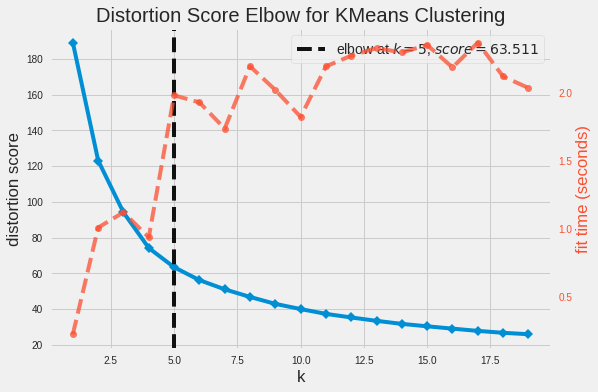

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42,n_init=20,max_iter=300)
visualizer = KElbowVisualizer(km, k=(1,20))
 
visualizer.fit(df[['power', 'pitch_mean','pitch_std','voiced_fraction']])        # Fit the data to the visualizer
visualizer.show()

### Silhouette Approach
Based on the two plots, the highest silhouette coefficient is for K=5 and using the elbow method the best vlue is also K=5, hence based on these 2 approaches the best value for KMeans algorithm is K=5.

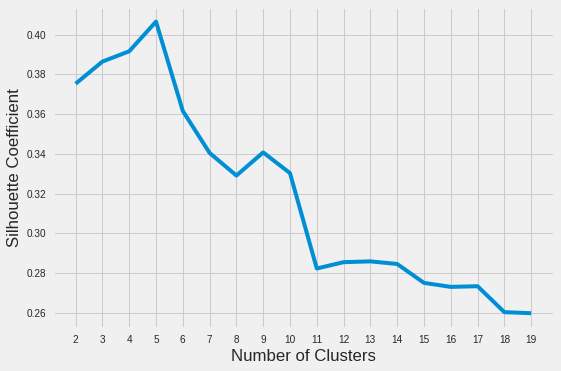

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 20):

  kmeans = KMeans(n_clusters=k,random_state=42,n_init=20,max_iter=300)
  kmeans.fit(df[['power', 'pitch_mean','pitch_std','voiced_fraction']])
  score = silhouette_score(df[['power', 'pitch_mean','pitch_std','voiced_fraction']], kmeans.labels_)
  silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### KMeans Clustering Implementation

Implementing the KMeans Algorithm with K=5 and other parameters used while selecting K value on the audio features, we get 5 clusters labelled as 0,1,2,3 & 4 resp.

In [10]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42,n_init=20,max_iter=300)
y_pred=kmeans.fit_predict(df[['power', 'pitch_mean','pitch_std','voiced_fraction']])
np.unique(y_pred)

array([0, 1, 2, 3, 4], dtype=int32)

The dataframe with the scaled features and the Cluster Labels for each instance in dataset is given below

In [11]:
f=MLENDLS_df.drop(['power','pitch_mean','pitch_std','voiced_fraction'], axis=1)
df=df.drop(['in_out','region'], axis=1,inplace=False)
f['Cluster']=y_pred                                                              #adding cluster label column for classification problem
frames = [f, df]
final = pd.concat(frames,axis=1)
final

,in_out,region,Participant,Cluster,power,pitch_mean,pitch_std,voiced_fraction
file_id,,,,,,,,
0001.wav,outdoor,british street,S151,2,0.321399,0.193237,0.016011,0.017386
0002.wav,indoor,kensington dinosaur,S127,4,0.122500,0.429019,0.245919,0.135358
0003.wav,outdoor,campus square,S18,0,0.068984,0.262711,0.091584,0.055188
0004.wav,indoor,kensington hintze,S179,0,0.197751,0.283260,0.127872,0.108108
0005.wav,outdoor,campus square,S176,0,0.027225,0.355954,0.181235,0.068886
...,...,...,...,...,...,...,...,...
2496.wav,outdoor,westend trafalgar,S151,2,0.391877,0.290848,0.059888,0.021698
2497.wav,outdoor,campus square,S6,4,0.172881,0.506960,0.292593,0.106786
2498.wav,indoor,westend national,S96,0,0.103077,0.270192,0.067174,0.082634


In [12]:
X1= final[['power', 'pitch_mean','pitch_std','voiced_fraction']].to_numpy()  #convert dataframe to array,storing features in X1 and cluster label y1
y1= final['Cluster'].to_numpy()
print(X1.shape)
print(y1.shape)

(2498, 4)
(2498,)


### Train-Test Split
Already in the previous section, MinMaxScaler Normalisation was implemented on the dataframe, now we extract those features which are converted in array format are used in the train-test split in the ratio of 7:3.



In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X1,y1,test_size=0.3,random_state=0)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

print("length of test set:",len(X_val))
print("length of training set:",len(X_train),'\n')

length of test set: 750
length of training set: 1748 



### Hyperparameter Optimization for Multiclass Classification

In [ ]:
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,make_scorer


mulnb_param={'alpha':[1.0], 'fit_prior':(True,False)}
knn_param = { 'n_neighbors':[3,5,7,9,11] , 'weights':('uniform','distance')}
dt_param = { 'criterion':('gini','entropy')}
rf_param =  { 'criterion':('gini','entropy')}


score=make_scorer(f1_score,average='macro')

grid_mulnb= GridSearchCV(estimator=MultinomialNB(),param_grid=mulnb_param,scoring=score, cv=10,verbose=1)            #SVM Gridsearch
mnb=grid_mulnb.fit(X_train,y_train)
print("best hyperparameter of MultinomialNB:",mnb.best_params_)
print("best MultinomialNB score using 10 fold CrossValidation:",grid_mulnb.best_score_ ,"\n")


grid_dt= GridSearchCV(estimator= DecisionTreeClassifier() , param_grid= dt_param ,scoring=score, cv=10,verbose=1)  #Logistic Regression Gridsearch
dt=grid_dt.fit(X_train,y_train)
print("best hyperparameter of  Decision Tree :",dt.best_params_)
print("best logistic regression score using 10 fold CrossValidation:",grid_dt.best_score_ ,"\n")

grid_knn= GridSearchCV(estimator=KNeighborsClassifier() , param_grid= knn_param ,scoring=score, cv=10,verbose=1)  #KNN Gridsearch
k=grid_knn.fit(X_train,y_train)
print("best hyperparameter of KNN:",k.best_params_)
print("best KNN score using 10 fold CrossValidation:",grid_knn.best_score_ ,"\n")

grid_rf= GridSearchCV(estimator=RandomForestClassifier() , param_grid= rf_param ,scoring=score, cv=10,verbose=1)  #KNN Gridsearch
rf=grid_rf.fit(X_train,y_train)
print("best hyperparameter of Random Forest:",rf.best_params_)
print("best Random Forest score using 10 fold CrossValidation:",grid_rf.best_score_ ,"\n")

best_model=[mnb,dt,k,rf]

grid_dict = {0: 'MultinomialNB', 1: 'Decision Tree',2: 'KNN',3: 'Random Forest'}

# Fit the gridsearch of various models
best_sc=0.0
best_classifier=0

grid_score=[]
grid_hyp=[]
for i,model in enumerate(best_model):

  grid_score.append(model.best_score_)
  grid_hyp.append(model.best_params_)
  i+=i

  if i>len(best_model):
    for j,mod in enumerate(best_model):
      
      if grid_score[j]> best_sc:
        best_sc= grid_score[j]
        best_grid=grid_hyp[j]
        best_classifier=j

print('Best Classifier:{}'.format(grid_dict[best_classifier]))
print('Hyperparameter of the best classifier:{}'.format(best_grid))




Fitting 10 folds for each of 2 candidates, totalling 20 fits
best hyperparameter of MultinomialNB: {'alpha': 1.0, 'fit_prior': False}
best MultinomialNB score using 10 fold CrossValidation: 0.7262910566183742 

Fitting 10 folds for each of 2 candidates, totalling 20 fits
best hyperparameter of  Decision Tree : {'criterion': 'entropy'}
best logistic regression score using 10 fold CrossValidation: 0.9263165201430917 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
best hyperparameter of KNN: {'n_neighbors': 9, 'weights': 'distance'}
best KNN score using 10 fold CrossValidation: 0.9510145578843648 

Fitting 10 folds for each of 2 candidates, totalling 20 fits
best hyperparameter of Random Forest: {'criterion': 'entropy'}
best Random Forest score using 10 fold CrossValidation: 0.93725546503291 

Best Classifier:KNN
Hyperparameter of the best classifier:{'n_neighbors': 9, 'weights': 'distance'}


### Best Model Implementation on Test Data

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

knn= KNeighborsClassifier(n_neighbors= 9, weights='distance') 
knn.fit(X_train,y_train)

print("Training data Accuracy using best hyperparameter:",knn.score(X_train,y_train))
print("Test data Accuracy  using best hyperparameter:",knn.score(X_val,y_val))

print("F1_score Macro of Best Model Test data : ",f1_score(y_val,knn.predict(X_val), average='macro'))


Training data Accuracy using best hyperparameter: 1.0
Test data Accuracy  using best hyperparameter: 0.9746666666666667
F1_score Macro of Best Model Test data :  0.9437601050161865


### Visualization

The best ML model is found to be the KNN classifier for the MLEndLS dataset. The model is evaluated on basis of confusion matrix given.

Overall there is mostly correct prediction against its ground truth values, and the difference in each diagonal values is because the number of counts of each cluster is imbalanced. Cluster 1 is has 7 incorrect predictions as cluster 5 whereas cluster 4 has no incorrect prediction which maybe due to the fact that the overall dataset has lesser number of cluster 4 instances.

#### Confusion Matrix

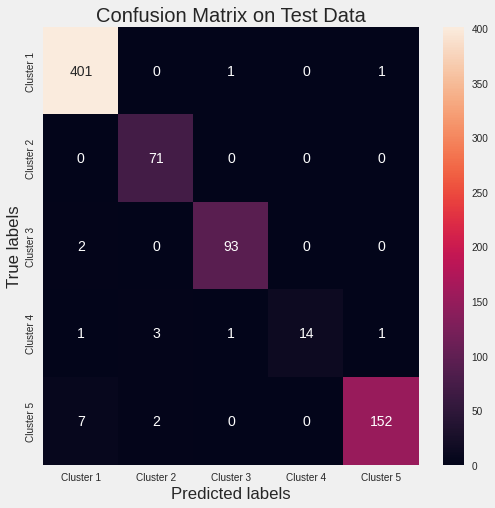

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val,knn.predict(X_val))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix on Test Data')
ax.xaxis.set_ticklabels(['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5'])                # 1-->Indoors , 0-->Outdoors
ax.yaxis.set_ticklabels(['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5'])
plt.show()

#### Cluster Histogram 

Below is the histogram plot of the entire dataset which displays the imbalance of the multiclass dataset with majority of the instances labelled as cluster 1 and the least is cluster 4, which shows less number of correct predictions in confusion matrix. Cluster 5 has around 500 instances whereas cluster 2 & 3 have between 200&400 with the latter having more instances.

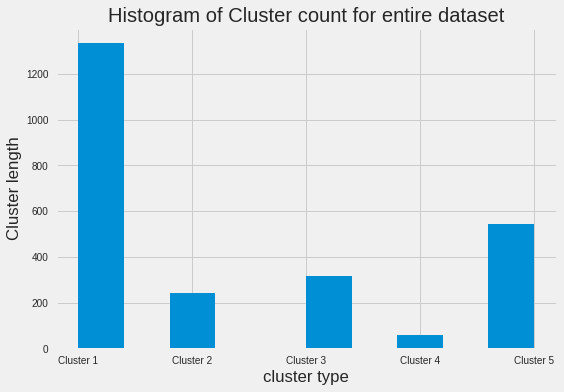

In [ ]:
# Cluster Histogram 
clust=["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5"]
y_pos=np.arange(len(clust))
values,bins,bars=plt.hist(final['Cluster'])
plt.xlabel("cluster type")
plt.ylabel("Cluster length")
plt.xticks(y_pos, clust)
plt.title("Histogram of Cluster count for entire dataset")
plt.show()

#### Histogram for Prdicted vs Ground Truth Clusters

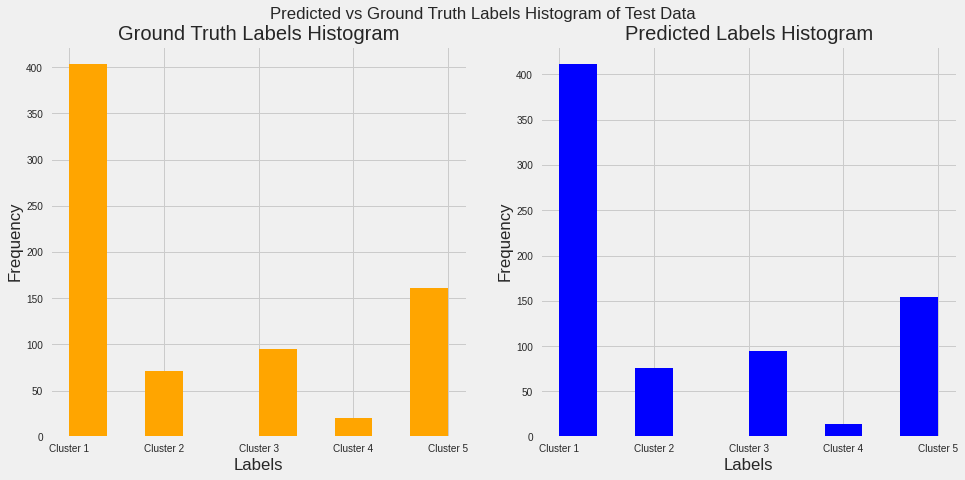

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred=knn.predict(X_val)
y_p=y_pred.astype(int)
y_gt=y_val.astype(int)

plt.figure(figsize=[14,7])
plt.suptitle("Predicted vs Ground Truth Labels Histogram of Test Data")

clust=["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5"]
y_pos=np.arange(len(clust))

plt.subplot(1,2,1)
values,bins,bars=plt.hist(y_gt,color= 'orange')
plt.title("Ground Truth Labels Histogram")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(y_pos, clust)

plt.subplot(1,2,2)
values,bins,bars=plt.hist(y_p,color= 'blue')
plt.title("Predicted Labels Histogram")
plt.xlabel("Labels")
plt.ylabel("Frequency")

plt.xticks(y_pos, clust)
plt.tight_layout(pad=2.0)
plt.show()


The above histogram plots histogram for Ground Truth Labels and Predicted Labels. Comparing the plots, the predicted labels for outdoor labels is more than ground truth labels whereas for indoor labels the predicted labels is less than ground truth labels.This suggests that the classifier classified certain points as false negative and false positive.

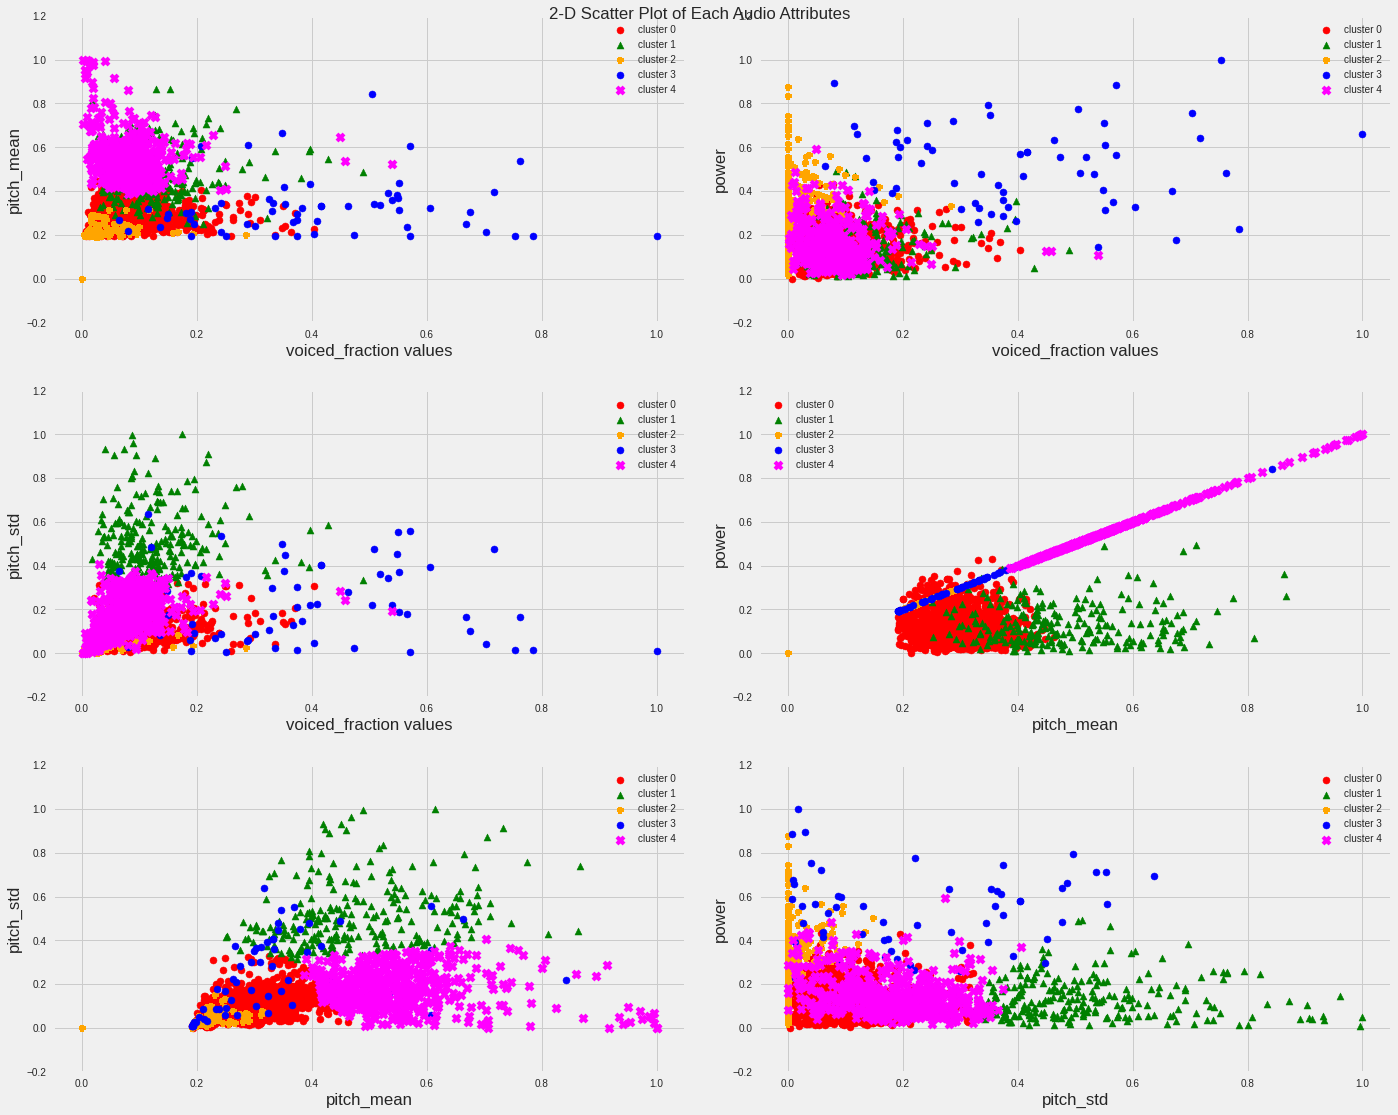

In [ ]:
import matplotlib.pyplot as plt

d1=final.loc[final['Cluster'] == 0]
d2=final.loc[final['Cluster'] == 1]
d3=final.loc[final['Cluster'] == 2]
d4=final.loc[final['Cluster'] == 3]
d5=final.loc[final['Cluster'] == 4]

plt.figure(figsize=[20,16])
plt.suptitle("2-D Scatter Plot of Each Audio Attributes")

plt.subplot(3,2,1)
plt.scatter(d1['voiced_fraction'] , d1['pitch_mean'] , color = 'red',label='cluster 0')
plt.scatter(d2['voiced_fraction'] , d2['pitch_mean'] , color = 'green',label='cluster 1',marker='^')
plt.scatter(d3['voiced_fraction'] , d3['pitch_mean'] , color = 'orange',label='cluster 2',marker='+')
plt.scatter(d4['voiced_fraction'] , d4['pitch_mean'] , color = 'blue',label='cluster 3',marker='o')
plt.scatter(d5['voiced_fraction'] , d5['pitch_mean'] , color = 'magenta',label='cluster 4',marker='x')
plt.xlabel("voiced_fraction values")
plt.ylabel("pitch_mean")
plt.legend()
plt.ylim([-0.2, 1.2])


plt.subplot(3,2,2)
plt.scatter(d1['voiced_fraction'] , d1['power'] , color = 'red',label='cluster 0')
plt.scatter(d2['voiced_fraction'] , d2['power'] , color = 'green',label='cluster 1',marker='^')
plt.scatter(d3['voiced_fraction'] , d3['power'] , color = 'orange',label='cluster 2',marker='+')
plt.scatter(d4['voiced_fraction'] , d4['power'] , color = 'blue',label='cluster 3',marker='o')
plt.scatter(d5['voiced_fraction'] , d5['power'] , color = 'magenta',label='cluster 4',marker='x')
plt.xlabel("voiced_fraction values")
plt.ylabel("power")
plt.legend()
plt.ylim([-0.2, 1.2])


plt.subplot(3,2,3)
plt.scatter(d1['voiced_fraction'] , d1['pitch_std'] , color = 'red',label='cluster 0')
plt.scatter(d2['voiced_fraction'] , d2['pitch_std'] , color = 'green',label='cluster 1',marker='^')
plt.scatter(d3['voiced_fraction'] , d3['pitch_std'] , color = 'orange',label='cluster 2',marker='+')
plt.scatter(d4['voiced_fraction'] , d4['pitch_std'] , color = 'blue',label='cluster 3',marker='o')
plt.scatter(d5['voiced_fraction'] , d5['pitch_std'] , color = 'magenta',label='cluster 4',marker='x')
plt.xlabel("voiced_fraction values")
plt.ylabel("pitch_std")
plt.legend()
plt.ylim([-0.2, 1.2])


plt.subplot(3,2,4)
plt.scatter(d1['pitch_mean'] , d1['power'] , color = 'red',label='cluster 0')
plt.scatter(d2['pitch_mean'] , d2['power'] , color = 'green',label='cluster 1',marker='^')
plt.scatter(d3['pitch_mean'] , d3['pitch_mean'] , color = 'orange',label='cluster 2',marker='+')
plt.scatter(d4['pitch_mean'] , d4['pitch_mean'] , color = 'blue',label='cluster 3',marker='o')
plt.scatter(d5['pitch_mean'] , d5['pitch_mean'] , color = 'magenta',label='cluster 4',marker='x')
plt.xlabel("pitch_mean")
plt.ylabel("power")
plt.legend()
plt.ylim([-0.2, 1.2])


plt.subplot(3,2,5)
plt.scatter(d1['pitch_mean'] , d1['pitch_std'] , color = 'red',label='cluster 0')
plt.scatter(d2['pitch_mean'] , d2['pitch_std'] , color = 'green',label='cluster 1',marker='^')
plt.scatter(d3['pitch_mean'] , d3['pitch_std'] , color = 'orange',label='cluster 2',marker='+')
plt.scatter(d4['pitch_mean'] , d4['pitch_std'] , color = 'blue',label='cluster 3',marker='o')
plt.scatter(d5['pitch_mean'] , d5['pitch_std'] , color = 'magenta',label='cluster 4',marker='x')
plt.xlabel("pitch_mean")
plt.ylabel("pitch_std")
plt.legend()
plt.ylim([-0.2, 1.2])

plt.subplot(3,2,6)
plt.scatter(d1['pitch_std'] , d1['power'] , color = 'red',label='cluster 0')
plt.scatter(d2['pitch_std'] , d2['power'] , color = 'green',label='cluster 1',marker='^')
plt.scatter(d3['pitch_std'] , d3['power'] , color = 'orange',label='cluster 2',marker='+')
plt.scatter(d4['pitch_std'] , d4['power'] , color = 'blue',label='cluster 3',marker='o')
plt.scatter(d5['pitch_std'] , d5['power'] , color = 'magenta',label='cluster 4',marker='x')
plt.xlabel("pitch_std")
plt.ylabel("power")
plt.legend()
plt.ylim([-0.2, 1.2])

plt.tight_layout(pad=2.0)
plt.show()

Above is the 2-d scatter plot of each of the 4 audio features with respect to each other, on the basis of the cluster labels identified using KMeans algorithm. In reality all these points are plotted in one space which is difficult to visualize, hence to give more valuable insights of each feature we can see how each clusters are formed wrt each attribute.

An interesting observation is for subplot 4 where cluster 2,3,4 are scattered in straight line which is not a good cluster as KMeans assumes clusters are spherical,especially like subplot 3 & 5. In the other subplots the clusters are mostly overlapping each **other**

# 8 Results
From the Hyperparameter Optimization step, the best ML model for the clustered label is found to be the KNN classifier with value of k=9 and weights parameter as 'distance'. The score of KNN across 10 folds is 95.10%
whereas the test score is 97.46%

Predicting 15 samples of test data using the best ML model. Below code shows the predicted labels against the ground truth labels where 
each number from 0 to 4 represents its respective cluster label.

In [ ]:
#predicting the first 15 test data
print("Predicted labels   :",knn.predict(X_val[0:15]))
print("Ground Truth labels:",y_val[0:15])

# 9 Conclusion
Using the KMeans Clustering algorithm, the best value of K is found to be 5,from the elbow and silhouette approach. Using the GridSearchCV function, the best ML model is the KNN classifier with n_neighbors=9 and weight=distance Hyperparameters and F1_macro score across 10 Fold Cross Validation is 95.10%

The score metric used in this analysis is the F1_macro score as the dataset is imbalanced and we are solving a multiclass classification problem based on cluster labels. The F1_macro score is better metric for imbalanced data over the F1_micro,accuracy,precision etc as this metric does not take into account the imbalance factor and predicts the f1 score within each class, hence suited for an imbalanced multilabelled dataset whereas f1_micro performs well for multiclass balanced data.

Although the training score is 100% but the  f1_score macro for the best model test data is 94.37% which shows that the model in general predicts test data very well.

Also more ML models like Gradient Boosting and Logistic Regression using multiclass settings, as well as use of more hyperparameter values for each model considered could be implemented to evaluate the best model and improve the score metric, although the performance of the chosen KNN model performs well.

